In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
pip install alpha_vantage requests pandas

19537.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [100]:
from alpha_vantage.timeseries import TimeSeries

API_KEY = "4CT7Q5APB1Q99DFK"
ts = TimeSeries(key=API_KEY, output_format="pandas")

data, meta_data = ts.get_daily(symbol="AAPL", outputsize="full")

In [101]:
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-07,235.105,241.3700,234.7600,239.07,46273565.0
2025-03-06,234.435,237.8600,233.1581,235.33,45170419.0
2025-03-05,235.420,236.5500,229.2300,235.74,47227643.0
2025-03-04,237.705,240.0700,234.6800,235.93,53798062.0
2025-03-03,241.790,244.0272,236.1120,238.03,47183985.0
...,...,...,...,...,...
1999-11-05,84.620,88.3700,84.0000,88.31,3721500.0
1999-11-04,82.060,85.3700,80.6200,83.62,3384700.0
1999-11-03,81.620,83.2500,81.0000,81.50,2932700.0


In [102]:
data.reset_index(inplace=True)

In [103]:
data.rename(columns={'1. open':'open','2. high': 'high','3. low':'low','4. close':'close','5. volume':'volume'}, inplace=True)

In [104]:
data

,date,open,high,low,close,volume
0,2025-03-07,235.105,241.3700,234.7600,239.07,46273565.0
1,2025-03-06,234.435,237.8600,233.1581,235.33,45170419.0
2,2025-03-05,235.420,236.5500,229.2300,235.74,47227643.0
3,2025-03-04,237.705,240.0700,234.6800,235.93,53798062.0
4,2025-03-03,241.790,244.0272,236.1120,238.03,47183985.0
...,...,...,...,...,...,...
6371,1999-11-05,84.620,88.3700,84.0000,88.31,3721500.0
6372,1999-11-04,82.060,85.3700,80.6200,83.62,3384700.0
6373,1999-11-03,81.620,83.2500,81.0000,81.50,2932700.0
6374,1999-11-02,78.000,81.6900,77.3100,80.25,3564600.0


In [105]:
ma_100_days = data.close.rolling(100).mean()
ma_50_days = data.close.rolling(50).mean()
ma_200_days = data.close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

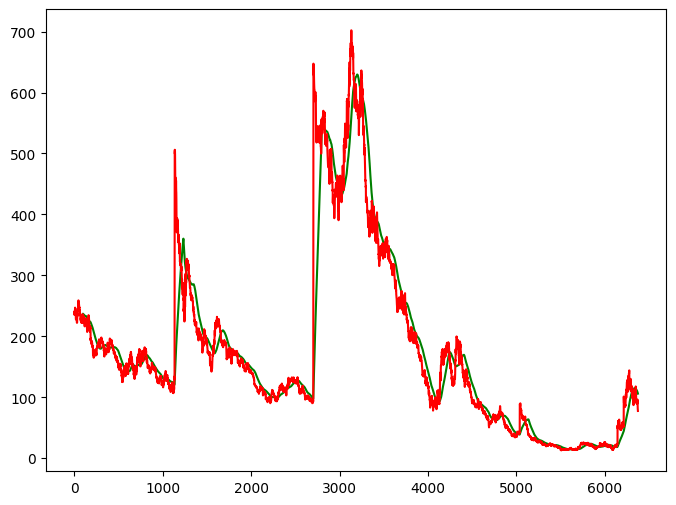

In [106]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'g')
plt.plot(data.close, 'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

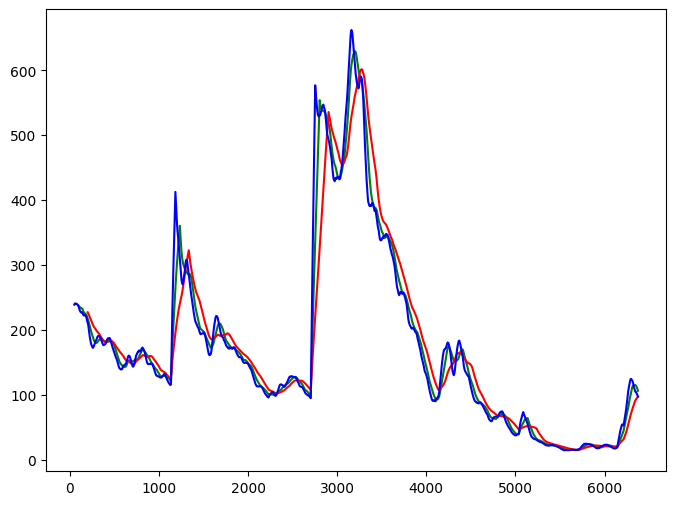

In [107]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'g')
plt.plot(ma_200_days, 'r')
plt.plot(ma_50_days, 'b')
plt.show

In [108]:
data.dropna(inplace=True)

In [109]:
data_train = pd.DataFrame(data.close[0:int(len(data)*0.8)])
data_test = pd.DataFrame(data.close[int(len(data)*0.8):len(data)])

In [54]:
# data_train.shape[0]
# data_test.shape[0]

array([[0.30681019],
       [0.30121113],
       [0.30182493],
       ...,
       [0.04652904],
       [0.05039148],
       [0.04928365]])

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler(feature_range=(0,1))

In [112]:
data_train_scale = scaler.fit_transform(data_train)

In [113]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [114]:
x, y = np.array(x), np.array(y)

In [115]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [116]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True, activation='relu'))
model.add(Dropout(0.3))

model.add(LSTM(units=80, return_sequences=True, activation='relu'))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [118]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - loss: 0.0267
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0053
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0048
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - loss: 0.0038
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0035
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - loss: 0.0038
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - loss: 0.0033
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - loss: 0.0030
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - loss: 0.0028
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - loss: 0.0021
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - loss: 0.0020
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0022
Epoch 13/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0026
Epoch 14/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0021
Epoch 15/50
157/

In [119]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [120]:
past_100_days = data_train.tail(100)

In [121]:
past_100_days

,close
5000,35.50
5001,37.14
5002,35.51
5003,37.09
5004,35.62
...,...
5095,65.78
5096,62.68
5097,65.21
5098,67.79


In [122]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)


In [123]:
data_test_scale = scaler.fit_transform(data_test)

In [124]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [125]:
y_predict = model.predict(x)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


In [126]:
scale =1/scaler.scale_
y_predict = scale*y_predict

In [127]:
y = y*scale

In [128]:
y_predict.reshape(-1)

array([45.31167578, 46.20522464, 46.46993154, ..., 68.09748434,
       66.19998204, 64.0539601 ])

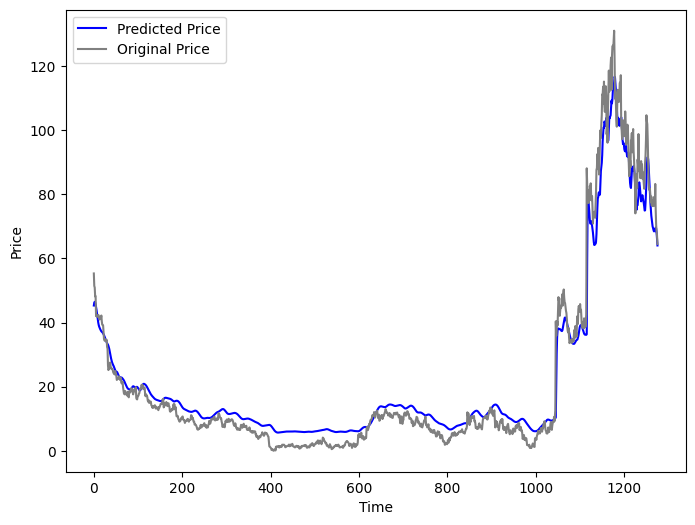

In [133]:
plt.figure(figsize=(8,6))
plt.plot(y_predict.reshape(-1),'blue',label = 'Predicted Price')
plt.plot(y,'grey',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [134]:
model.save('Stock Predictions Model.keras')